In [2]:
import time as time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering

In [25]:
###############################################################################
# Generate data
lena = sp.misc.face()
# Downsample the image by a factor of 4
#lena = lena[::2, ::2] + lena[1::2, ::2] + lena[::2, 1::2] + lena[1::2, 1::2]
X = np.reshape(lena, (-1, 1))



In [27]:
X[0]

array([121], dtype=uint8)

In [31]:
# connectivity

<2359296x2359296 sparse matrix of type '<type 'numpy.int64'>'
	with 14931456 stored elements in COOrdinate format>

In [24]:
lena.shape

(768, 1024, 3)

In [30]:
###############################################################################
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*lena.shape)


In [10]:
##############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 15  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters,
        linkage='ward', connectivity=connectivity).fit(X)
label = np.reshape(ward.labels_, lena.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)



Compute structured hierarchical clustering...
('Elapsed time: ', 139.56812500953674)
('Number of pixels: ', 589824)
('Number of clusters: ', 15)


TypeError: Input must be a 2D array.

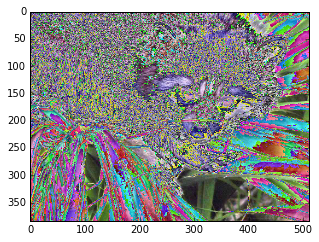

In [11]:
###############################################################################
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(lena, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()